In [1]:
# Import necessary modules
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
sys.path.append("../scripts")  # Add scripts folder to the path

In [2]:

from data_loader import load_stock_data
from sentiment_analysis import calculate_sentiment, classify_sentiment, add_sentiment_column, extract_common_keywords, display_topics



In [4]:
# Load the dataset
file_path = "../data/raw_analyst_ratings.csv"
df = load_stock_data(file_path)

In [6]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [14]:

df_sample = df.sample(100)  # Process 100 random rows
df_sample = add_sentiment_column(df_sample, column='headline')

In [16]:
# Add sentiment columns (polarity and sentiment classification)
df = add_sentiment_column(df_sample, column='headline')

In [17]:
# Display the updated dataframe with sentiment columns
print("\nSentiment Analysis Results:")
print(df[['headline', 'polarity', 'sentiment']].head())


Sentiment Analysis Results:
                                                  headline  polarity sentiment
766716                10 Stocks To Watch For July 23, 2019      0.00   Neutral
33433    Top 5 Stocks In The Gold Industry With The Hig...      0.25  Positive
1394435  Option Alert: YNDX Fri 7/1 22.0 Calls (Wkly) S...      0.00   Neutral
277991   CommScope Sees FY 2017 EPS $2.90 to $3.00 vs $...      0.00   Neutral
299457   Criteo Sees Prelim. Q1 Sales ex-TAC $204M-$206...      0.00   Neutral


In [18]:
# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
sentiment
Neutral     69
Positive    26
Negative     5
Name: count, dtype: int64


In [20]:
# Extract common keywords from the headlines
n_keywords = 10  # Number of top keywords to extract
keywords = extract_common_keywords(df, column='headline', n_keywords=n_keywords)

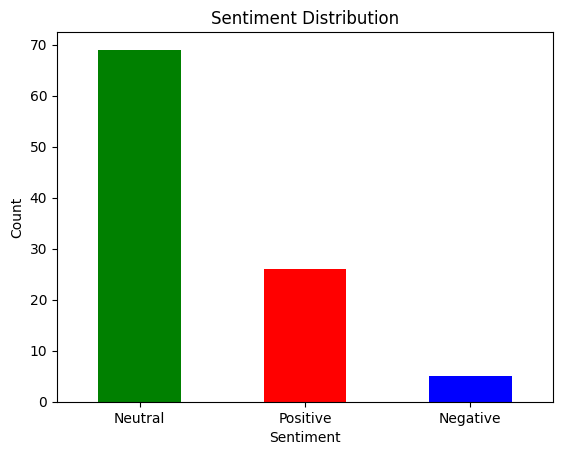

In [22]:
# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [26]:
#topic_modeling
keywords = extract_common_keywords(df, column="headline")
print("\nExtracted Keywords:")
print(keywords)


Extracted Keywords:
['benzinga' 'downgrades' 'earnings' 'eps' 'est' 'friday' 'price' 'reports'
 'stocks' 'vs']
